https://py-eddy-tracker.readthedocs.io/en/stable/python_module/02_eddy_identification/pet_eddy_detection.html

Using subset of MIOST from: file:///Users/Gomez023/Postdoc/develop/FaSt-SWOT/SWOT/L4_data/MIOST/2025-02-10_SWOT_L4_MIOST_test02.ipynb

In [1]:
# venv_fswot


In [2]:
from datetime import datetime

from matplotlib import pyplot as plt
from numpy import arange

import xarray as xr

import matplotlib.gridspec   as gridspec

import numpy as np


In [3]:
from glob import glob
import os
import cartopy

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [4]:
lon_min_ax, lon_max_ax = -6., 9.
lat_min_ax, lat_max_ax = 35., 45.

def start_axes(title):
    fig = plt.figure(figsize=(13, 5))
    ax = fig.add_axes([0.03, 0.03, 0.90, 0.94])
    ax.set_xlim(lon_min_ax, lon_max_ax), ax.set_ylim(lat_min_ax, lat_max_ax)
    # ax.set_xlim(-6, 36.5), ax.set_ylim(30, 46)
    ax.set_aspect("equal")
    ax.set_title(title, weight="bold")
    return ax


def update_axes(ax, mappable=None):
    ax.grid()
    if mappable:
        plt.colorbar(mappable, cax=ax.figure.add_axes([0.94, 0.05, 0.01, 0.9]))

# Loading data:

Excel table summary of products: https://docs.google.com/spreadsheets/d/1C158mfmO8Upv0Vy_u3HzKZi2o4vD9cwKa1Yxz-36PBg/edit?gid=0#gid=0

## CMS DT/MT
(hard disk) : /Users/Gomez023/src/git/OSR10/statistics/saving_DUACS-OI_DT_hard_disk.ipynb

In [5]:
nyears = np.arange(2003, 2024, 1)

In [6]:
nyears[0:-1]

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [7]:
ds_duacs_all_my = xr.open_mfdataset(
    'ds_duacs*mean.nc', # files
    combine="nested",
    concat_dim="year"
)

# Add coordinate labels to the 'year' dimension
ds_duacs_all_my = ds_duacs_all_my.assign_coords(year=("year", nyears))

In [8]:
ds_duacs_all_my

<xarray.Dataset>
Dimensions:         (year: 21, latitude: 370, nv: 2, longitude: 578)
Coordinates:
  * latitude        (latitude) float32 19.94 20.06 20.19 ... 65.81 65.94 66.06
  * longitude       (longitude) float32 -30.06 -29.94 -29.81 ... 41.94 42.06
  * nv              (nv) int32 0 1
  * year            (year) int64 2003 2004 2005 2006 ... 2020 2021 2022 2023
Data variables: (12/14)
    crs             (year) float64 -2.147e+09 -2.147e+09 ... -2.147e+09
    lat_bnds        (year, latitude, nv) float32 dask.array<chunksize=(1, 370, 2), meta=np.ndarray>
    lon_bnds        (year, longitude, nv) float32 dask.array<chunksize=(1, 578, 2), meta=np.ndarray>
    sla             (year, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    err_sla         (year, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    ugosa           (year, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    ...              ...
    err_vgosa       (year, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    adt             (year, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    ugos            (year, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    vgos            (year, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    flag_ice        (year, latitude, longitude) float64 dask.array<chunksize=(1, 370, 578), meta=np.ndarray>
    tpa_correction  (year) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [9]:
ds_duacs_all_my.year

<xarray.DataArray 'year' (year: 21)>
array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
Coordinates:
  * year     (year) int64 2003 2004 2005 2006 2007 ... 2019 2020 2021 2022 2023

## CMS NRT

In [10]:
indir_duacs_nrt = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/"


### 2023:

In [11]:
# nmonths restriction ? (august to 12)

In [12]:
nyear = 2023


In [13]:
fname = "wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_" + str(nyear) + "*_sub.nc"


In [14]:
data_paths = sorted(glob(indir_duacs_nrt + fname))
print(len(data_paths))

153


In [15]:
ds_duacs_all_nrt_23 = xr.open_mfdataset(data_paths)

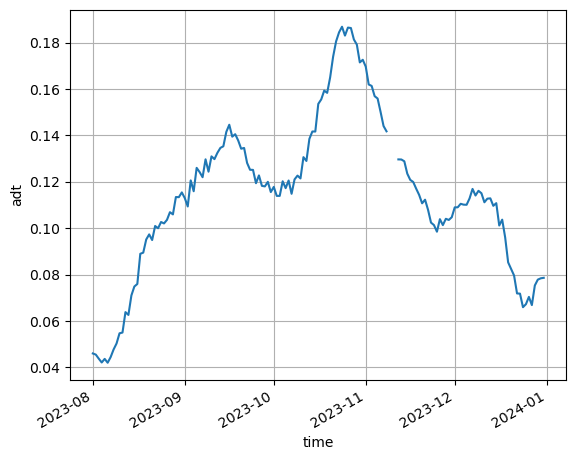

In [16]:
ds_duacs_all_nrt_23.adt.mean(dim="latitude").mean(dim="longitude").plot()
plt.grid()

### --> missing days in november??

In [17]:
data_paths

['/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20230801_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20230802_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20230803_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20230804_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20230805_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_20230806_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/OSR10/Data/CMS/Europe/NRT/subset/wmed_cmems_obs-sl_eur_ph

#### Checking days:

See notebook: statistics/calc_Evan_test02_checkCMEMS-NRT_112023.ipynb

### 2024:

In [18]:
nyear = 2024


In [19]:
fname = "wmed_cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_" + str(nyear) + "*_sub.nc"


In [20]:
data_paths = sorted(glob(indir_duacs_nrt + fname))
# data_paths

In [21]:
ds_duacs_all_nrt_24 = xr.open_mfdataset(data_paths)

In [22]:
ds_duacs_all_nrt_24

<xarray.Dataset>
Dimensions:    (time: 152, latitude: 88, longitude: 120)
Coordinates:
  * time       (time) datetime64[ns] 2024-01-01 2024-01-02 ... 2024-05-31
  * latitude   (latitude) float32 34.06 34.19 34.31 34.44 ... 44.69 44.81 44.94
  * longitude  (longitude) float32 -5.938 -5.812 -5.688 ... 8.688 8.812 8.938
Data variables:
    adt        (time, latitude, longitude) float32 dask.array<chunksize=(1, 88, 120), meta=np.ndarray>
    err_sla    (time, latitude, longitude) float32 dask.array<chunksize=(1, 88, 120), meta=np.ndarray>
    err_ugosa  (time, latitude, longitude) float32 dask.array<chunksize=(1, 88, 120), meta=np.ndarray>
    err_vgosa  (time, latitude, longitude) float32 dask.array<chunksize=(1, 88, 120), meta=np.ndarray>
    flag_ice   (time, latitude, longitude) float32 dask.array<chunksize=(1, 88, 120), meta=np.ndarray>
    sla        (time, latitude, longitude) float32 dask.array<chunksize=(1, 88, 120), meta=np.ndarray>
    ugos       (time, latitude, longitude) float32 dask.array<chunksize=(1, 88, 120), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float32 dask.array<chunksize=(1, 88, 120), meta=np.ndarray>
    vgos       (time, latitude, longitude) float32 dask.array<chunksize=(1, 88, 120), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float32 dask.array<chunksize=(1, 88, 120), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.11
    title:             NRT merged all satellites European Seas Gridded SSALTO...
    institution:       CLS, CNES
    source:            Altimetry measurements
    history:           2023-11-24 01:50:18Z: Creation
    contact:           servicedesk.cmems@mercator-ocean.eu
    references:        http://marine.copernicus.eu
    comment:           Sea Surface Height measured by Altimetry and derived v...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SEALEVEL_EUR_PHY_L4_NRT_008_060
    subset:datasetId:  cmems_obs-sl_eur_phy-ssh_nrt_allsat-l4-duacs-0.125deg_...
    subset:date:       2025-05-02T19:35:32.639Z

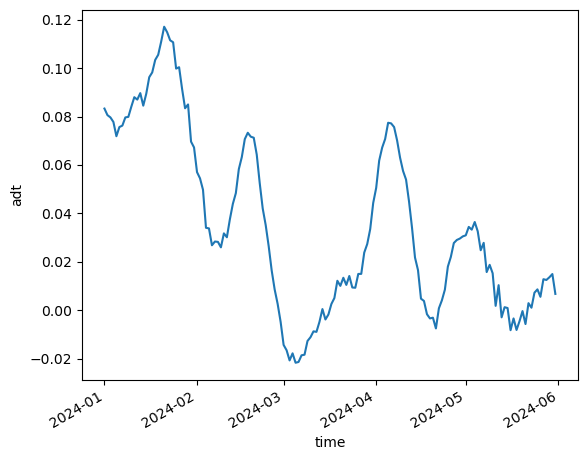

In [23]:
ds_duacs_all_nrt_24.adt.mean(dim="latitude").mean(dim="longitude").plot()


# --> till 31/05/24

## MIOST-K

### v2.0.1

In [24]:
indir_miost = "/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/"
indir = indir_miost + 'subset/'


* 2023:

In [25]:
nyear = 2023

In [26]:
data_paths_MIOST_v201 = sorted(glob(indir + "dt_global_allsat_phy_l4_" + str(nyear) + "*_sub.nc"))

In [27]:
# data_paths_MIOST_v201 # till 31/05/24 for now!

In [28]:
len(data_paths_MIOST_v201)

153

In [29]:
ds_miostk_v201_all_23 = xr.open_mfdataset(data_paths_MIOST_v201)

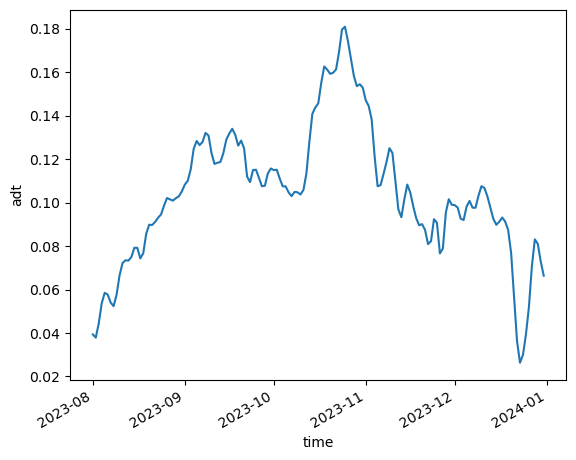

In [30]:
ds_miostk_v201_all_23.adt.mean(dim="latitude").mean(dim="longitude").plot()


* 2024:

In [31]:
nyear = 2024

In [32]:
data_paths_MIOST_v201 = sorted(glob(indir + "dt_global_allsat_phy_l4_" + str(nyear) + "*_sub.nc"))

In [33]:
data_paths_MIOST_v201 # till 31/05/24 for now!

['/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240101_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240102_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240103_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240104_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240105_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/SWOT/ftp_aviso/swot_products/l4_karin_nadir/v2.0.1/miost/subset/dt_global_allsat_phy_l4_20240106_sub.nc',
 '/Users/Gomez023/Nextcloud/Projects/FaSt-SWOT/Data/

-->  till 31/05/24 for now!

In [34]:
len(data_paths_MIOST_v201)

182

In [35]:
ds_miostk_v201_all_24 = xr.open_mfdataset(data_paths_MIOST_v201)

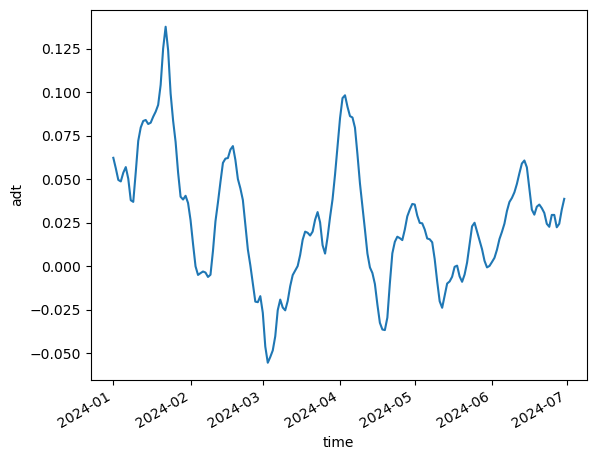

In [36]:
ds_miostk_v201_all_24.adt.mean(dim="latitude").mean(dim="longitude").plot()


# Plot:
(Vertical, horizontal in test01)

## CMS DUACS MY:

In [37]:
ds_duacs_all_my_mean = ds_duacs_all_my.mean(dim="year")

In [38]:
ds_duacs_all_my_mean

<xarray.Dataset>
Dimensions:         (latitude: 370, nv: 2, longitude: 578)
Coordinates:
  * latitude        (latitude) float32 19.94 20.06 20.19 ... 65.81 65.94 66.06
  * longitude       (longitude) float32 -30.06 -29.94 -29.81 ... 41.94 42.06
  * nv              (nv) int32 0 1
Data variables: (12/14)
    crs             float64 -2.147e+09
    lat_bnds        (latitude, nv) float32 dask.array<chunksize=(370, 2), meta=np.ndarray>
    lon_bnds        (longitude, nv) float32 dask.array<chunksize=(578, 2), meta=np.ndarray>
    sla             (latitude, longitude) float64 dask.array<chunksize=(370, 578), meta=np.ndarray>
    err_sla         (latitude, longitude) float64 dask.array<chunksize=(370, 578), meta=np.ndarray>
    ugosa           (latitude, longitude) float64 dask.array<chunksize=(370, 578), meta=np.ndarray>
    ...              ...
    err_vgosa       (latitude, longitude) float64 dask.array<chunksize=(370, 578), meta=np.ndarray>
    adt             (latitude, longitude) float64 dask.array<chunksize=(370, 578), meta=np.ndarray>
    ugos            (latitude, longitude) float64 dask.array<chunksize=(370, 578), meta=np.ndarray>
    vgos            (latitude, longitude) float64 dask.array<chunksize=(370, 578), meta=np.ndarray>
    flag_ice        (latitude, longitude) float64 dask.array<chunksize=(370, 578), meta=np.ndarray>
    tpa_correction  float64 0.0

## CMS duacs nrt:

In [39]:
ds_duacs_all_nrt_23_mean = ds_duacs_all_nrt_23.mean(dim="time")


In [40]:
ds_duacs_all_nrt_24_mean = ds_duacs_all_nrt_24.mean(dim="time")


In [41]:

ds_duacs_all_nrt_mean = (ds_duacs_all_nrt_23_mean + ds_duacs_all_nrt_24_mean) / 2


## MIOST-K v2.0.1:

In [42]:
ds_miostk_v201_all_23_mean = ds_miostk_v201_all_23.mean(dim="time")


In [43]:
ds_miostk_v201_all_24_mean = ds_miostk_v201_all_24.mean(dim="time")


In [44]:

ds_miostk_v201_all_mean = (ds_miostk_v201_all_23_mean + ds_miostk_v201_all_24_mean) / 2


In [45]:
# ds_duacs_all_my_mean
# ds_duacs_all_nrt_mean
# ds_miostk_v201_all_mean

# Plot:

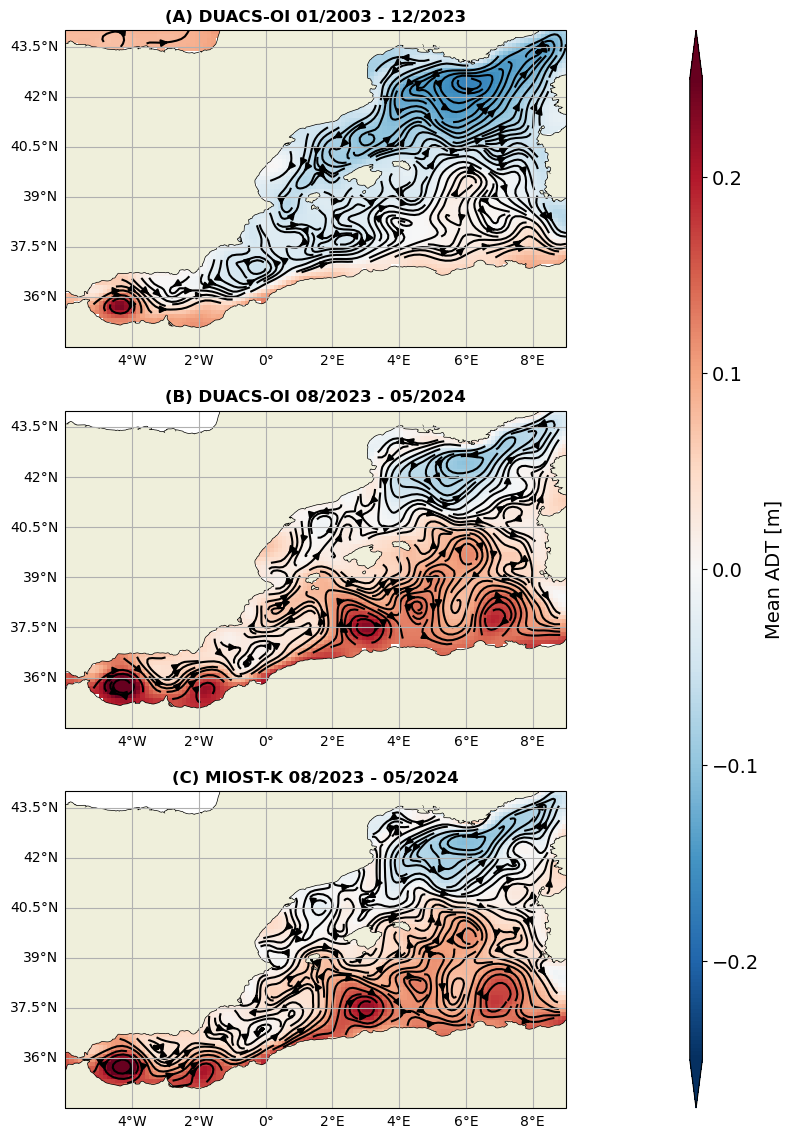

In [46]:

## 1. SLA as is:
# output_filename = savefigs_dir + figname_root + f"_{day_str}.png"
# Create a figure and axis with a map projection
# fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

plt.figure(figsize=(9, 14))
gs = gridspec.GridSpec(3, 2, width_ratios=[.98, .02])
axC = plt.subplot(gs[:,-1])

#########################
# Plot the data
ax = plt.subplot(gs[0,0], projection=ccrs.PlateCarree())

ds_duacs_all_my_mean.adt.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False
                                         , vmin=-.25, vmax=.25, cmap='RdBu_r')
                                        # cbar_kwargs={"shrink": 0.6, "pad": 0.05, "extend": 'both', "ax": axC, "orientation": 'horizontal'})  # Shrink colorbar & adjust spacing                                         

# Add coastlines and grid lines
ax.coastlines() #ax1.coastlines(resolution='10m', zorder=30)
ax.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'], zorder=2) #'k') #cartopy.feature.COLORS['land'])
ax.set_extent([-6, 9, 34.5, 44], crs=ccrs.PlateCarree())

# Plot the data
ax.streamplot(ds_duacs_all_my_mean.longitude, ds_duacs_all_my_mean.latitude
              , ds_duacs_all_my_mean.ugos, ds_duacs_all_my_mean.vgos
              , color='k'
              , transform=ccrs.PlateCarree(), density=3)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True);     
gl.top_labels = False; gl.right_labels = False

ax.set_title('(A) DUACS-OI 01/2003 - 12/2023', fontweight='bold')

#########################
# Plot the data
ax = plt.subplot(gs[1,0], projection=ccrs.PlateCarree())
ds_duacs_all_nrt_mean.adt.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False
                                          , vmin=-.25, vmax=.25, cmap='RdBu_r')
                                        # cbar_kwargs={"shrink": 0.6, "pad": 0.05, "extend": 'both', "ax": axC, "orientation": 'horizontal'})  # Shrink colorbar & adjust spacing                                         

# Add coastlines and grid lines
ax.coastlines() #ax1.coastlines(resolution='10m', zorder=30)
ax.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'], zorder=2) #'k') #cartopy.feature.COLORS['land'])
ax.set_extent([-6, 9, 34.5, 44], crs=ccrs.PlateCarree())

# Plot the data
ax.streamplot(ds_duacs_all_nrt_mean.longitude, ds_duacs_all_nrt_mean.latitude
              , ds_duacs_all_nrt_mean.ugos, ds_duacs_all_nrt_mean.vgos
              , color='k'
              , transform=ccrs.PlateCarree(), density=3)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True);     
gl.top_labels = False; gl.right_labels = False

ax.set_title('(B) DUACS-OI 08/2023 - 05/2024', fontweight='bold')

#########################
# Plot the data
ax = plt.subplot(gs[2,0], projection=ccrs.PlateCarree())
cc = ds_miostk_v201_all_mean.adt.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False
                                                       , vmin=-.25, vmax=.25, cmap='RdBu_r')
                                        # cbar_kwargs={"shrink": 0.6, "pad": 0.05, "extend": 'both', "ax": axC, "orientation": 'horizontal'})  # Shrink colorbar & adjust spacing                                         

# Add coastlines and grid lines
ax.coastlines() #ax1.coastlines(resolution='10m', zorder=30)
ax.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'], zorder=2) #'k') #cartopy.feature.COLORS['land'])
ax.set_extent([-6, 9, 34.5, 44], crs=ccrs.PlateCarree())

# Plot the data
ax.streamplot(ds_miostk_v201_all_mean.longitude, ds_miostk_v201_all_mean.latitude
              , ds_miostk_v201_all_mean.ugos, ds_miostk_v201_all_mean.vgos
              , color='k'
              , transform=ccrs.PlateCarree(), density=3)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True);     
gl.top_labels = False; gl.right_labels = False

ax.set_title('(C) MIOST-K 08/2023 - 05/2024', fontweight='bold')

#cbar
cbar = plt.colorbar(cc, cax=axC, extend='both')
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Mean ADT [m]', size=14)

# Save the figure
# plt.savefig(output_filename, dpi=300, bbox_inches="tight");  print(f"Saved {output_filename}")
# Show the plot
plt.show()


missing 2024 for first plot (but not fully available. only nov 2024), and data june to december for last 2 plots!

# Pending:
- [ ] remove Atlantic part DUACS DT?
- [ ] SPEED-UP PLOT
    - [ ] CHUNKING?
- [ ] X

In [38]:
# outdir = "/Users/Gomez023/Nextcloud/Projects/OSR10/Data/outputs/eddy-tracker/"

# Differences plot:

In [48]:
diffs_adt = ds_miostk_v201_all_mean.adt - ds_duacs_all_nrt_mean.adt

In [50]:
diffs_adt.shape

(88, 120)

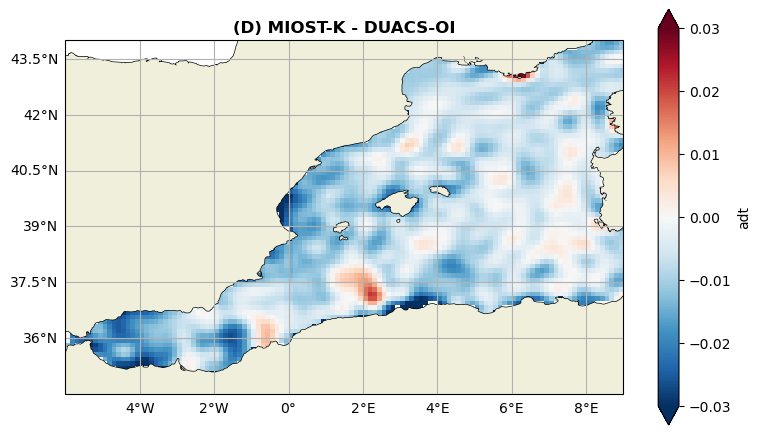

In [56]:

## 1. SLA as is:
# output_filename = savefigs_dir + figname_root + f"_{day_str}.png"
# Create a figure and axis with a map projection
# fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

plt.figure(figsize=(9, 9))
# gs = gridspec.GridSpec(3, 2, width_ratios=[.98, .02])
# axC = plt.subplot(gs[:,-1])

#########################
# Plot the data
ax = plt.subplot(111, projection=ccrs.PlateCarree())
diffs_adt.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree()#, add_colorbar=False
                                          , cmap='RdBu_r', vmin=-.03, vmax=.03
                                          , cbar_kwargs={"shrink": 0.6, "pad": 0.05}) #, "extend": 'both', "ax": axC, "orientation": 'horizontal'})  # Shrink colorbar & adjust spacing                                         

# Add coastlines and grid lines
ax.coastlines() #ax1.coastlines(resolution='10m', zorder=30)
ax.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'], zorder=2) #'k') #cartopy.feature.COLORS['land'])
ax.set_extent([-6, 9, 34.5, 44], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True);     
gl.top_labels = False; gl.right_labels = False

ax.set_title('(D) MIOST-K - DUACS-OI', fontweight='bold')

#########################
# Plot the data
# ax = plt.subplot(gs[2,0], projection=ccrs.PlateCarree())
# cc = ds_miostk_v201_all_mean.adt.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False
#                                                        , vmin=-.25, vmax=.25, cmap='RdBu_r')
#                                         # cbar_kwargs={"shrink": 0.6, "pad": 0.05, "extend": 'both', "ax": axC, "orientation": 'horizontal'})  # Shrink colorbar & adjust spacing                                         

#cbar
# cbar = plt.colorbar(cc, extend='both')
# cbar.ax.tick_params(labelsize=14) 
# cbar.set_label('Mean ADT [m]', size=14)

# Save the figure
# plt.savefig(output_filename, dpi=300, bbox_inches="tight");  print(f"Saved {output_filename}")
# Show the plot
plt.show()
